# 1. Read collected data & pre-process

In [1]:
# Import relevant dependencies
import pandas as pd
import os
from sklearn.model_selection import train_test_split

In [2]:
# Initialize main directory location
path = os.getcwd()
main_directory = os.path.dirname(path)

# Read combined .csv dataset file from previous data collection
df = pd.read_csv(main_directory + '/dataset/keypoints_combined_v3.csv')

In [3]:
df.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,A,0,0,-0.175716,0.220965,-0.211916,0.533937,-0.184012,0.797134,-0.192308,...,0.139517,0.381599,0.365008,0.397436,0.417798,0.487934,0.300905,0.356712,0.250377,0.321267
1,A,0,0,-0.192946,0.240664,-0.272822,0.557054,-0.267635,0.809129,-0.206432,...,0.140041,0.349585,0.378631,0.429461,0.411826,0.576763,0.329876,0.429461,0.280083,0.340249
2,A,0,0,-0.190476,0.239130,-0.268116,0.552795,-0.260870,0.804348,-0.206004,...,0.132505,0.342650,0.378882,0.420290,0.415114,0.568323,0.324017,0.420290,0.268116,0.329193
3,A,0,0,-0.266212,0.179750,-0.427759,0.476678,-0.431172,0.786121,-0.369738,...,0.043231,0.550626,0.275313,0.583618,0.325370,0.711035,0.258248,0.530148,0.216155,0.490330
4,A,0,0,-0.232955,0.179383,-0.375812,0.495942,-0.403409,0.782468,-0.387175,...,0.101461,0.437500,0.370130,0.540584,0.387175,0.594968,0.275162,0.424513,0.233766,0.393669


In [4]:
df.tail()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
1294,Z,0,0,-0.186107,0.115334,-0.301442,0.323722,-0.251638,0.529489,-0.131062,...,-0.041940,0.343381,0.117955,0.422018,0.104849,0.505898,0.060288,0.372215,0.056356,0.300131
1295,Z,0,0,-0.024024,-0.117117,0.076577,-0.147147,0.310811,-0.117117,0.534535,...,0.409038,0.027810,0.484357,0.100811,0.597914,0.023175,0.495944,-0.032445,0.411356,-0.017381
1296,Z,0,0,0.063452,0.032995,0.228426,0.041878,0.447970,0.002538,0.656091,...,0.389552,0.058209,0.462687,0.120896,0.573134,0.055224,0.477612,0.011940,0.389552,0.023881
1297,Z,0,0,-0.031250,0.040179,0.142857,0.120536,0.406250,0.142857,0.616071,...,0.319797,-0.076142,0.482234,0.172589,0.573604,0.060914,0.446701,-0.040609,0.345178,-0.076142
1298,Z,0,0,0.016393,-0.021858,0.224044,0.049180,0.513661,0.065574,0.715847,...,0.205980,-0.106312,0.478405,0.016611,0.501661,-0.083056,0.345515,-0.136213,0.249169,-0.132890


In [5]:
# Initialize dataset feature and target values
x = df.drop('class', axis=1).values # features
y = df['class'].values # target value

In [6]:
# Split data into 80/20 for training part and testing part
# Randomize dataset contents (to avoid possible over-fitting)
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, stratify=y, random_state=42)

In [7]:
print(y_test)


['Z' 'M' 'W' 'F' 'K' 'R' 'T' 'B' 'J' 'V' 'B' 'F' 'Z' 'X' 'Q' 'F' 'R' 'R'
 'E' 'H' 'O' 'L' 'V' 'S' 'T' 'G' 'E' 'C' 'A' 'E' 'V' 'S' 'S' 'N' 'H' 'H'
 'G' 'D' 'I' 'P' 'L' 'S' 'B' 'C' 'C' 'U' 'B' 'O' 'C' 'A' 'H' 'T' 'C' 'G'
 'N' 'M' 'J' 'Y' 'V' 'E' 'Z' 'K' 'A' 'E' 'A' 'Z' 'G' 'J' 'L' 'Y' 'W' 'R'
 'C' 'X' 'N' 'D' 'V' 'C' 'K' 'M' 'L' 'L' 'O' 'P' 'I' 'Q' 'W' 'E' 'Y' 'F'
 'P' 'I' 'Y' 'B' 'S' 'K' 'D' 'F' 'I' 'P' 'K' 'R' 'K' 'C' 'U' 'L' 'Z' 'X'
 'P' 'Y' 'M' 'H' 'Y' 'Z' 'Q' 'C' 'Q' 'O' 'G' 'M' 'L' 'N' 'G' 'E' 'N' 'Z'
 'S' 'Z' 'W' 'F' 'M' 'R' 'W' 'B' 'D' 'K' 'N' 'A' 'J' 'S' 'X' 'L' 'U' 'J'
 'N' 'I' 'F' 'B' 'M' 'P' 'I' 'T' 'A' 'V' 'X' 'Q' 'Y' 'E' 'J' 'P' 'S' 'Z'
 'O' 'T' 'H' 'D' 'R' 'J' 'J' 'M' 'D' 'W' 'G' 'H' 'S' 'U' 'N' 'L' 'O' 'T'
 'V' 'Q' 'N' 'U' 'M' 'X' 'V' 'K' 'G' 'U' 'J' 'Q' 'D' 'F' 'T' 'T' 'C' 'A'
 'B' 'U' 'M' 'J' 'Y' 'W' 'O' 'W' 'H' 'B' 'X' 'A' 'H' 'X' 'N' 'U' 'V' 'P'
 'D' 'R' 'I' 'Q' 'E' 'E' 'B' 'K' 'F' 'I' 'O' 'R' 'O' 'Q' 'A' 'F' 'U' 'T'
 'P' 'Y' 'S' 'R' 'G' 'H' 'T' 'U' 'V' 'A' 'I' 'K' 'G

# 2. Train machine learning classification model

In [8]:
# import relevant dependencies and model libraries
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [9]:
# Initialize training pipelines
pipelines = {
    'SVM':make_pipeline(StandardScaler(), SVC(probability=True, kernel='linear'))   
}

In [10]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(x_train, y_train)
    fit_models[algo] = model

In [11]:
fit_models

{'SVM': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(kernel='linear', probability=True))])}

# 3. Evaluate model

In [12]:
# Import dependencies
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


              precision    recall  f1-score   support

           A       1.00      1.00      1.00        10
           B       1.00      1.00      1.00        10
           C       1.00      1.00      1.00        10
           D       1.00      0.90      0.95        10
           E       1.00      1.00      1.00        10
           F       1.00      1.00      1.00        10
           G       1.00      1.00      1.00        10
           H       1.00      1.00      1.00        10
           I       1.00      1.00      1.00        10
           J       1.00      1.00      1.00        10
           K       1.00      1.00      1.00        10
           L       1.00      1.00      1.00        10
           M       1.00      1.00      1.00        10
           N       1.00      1.00      1.00        10
           O       1.00      1.00      1.00        10
           P       1.00      1.00      1.00        10
           Q       1.00      1.00      1.00        10
           R       1.00    

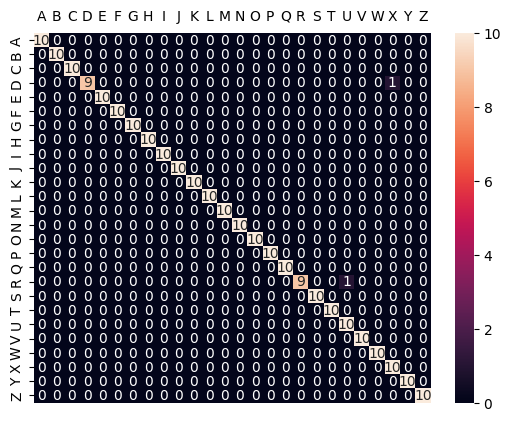

In [13]:
# Run training evaluation
for algo, model in fit_models.items():
    pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    sns.heatmap(cm, annot=True, fmt='g', ax=ax, xticklabels=labels, yticklabels=labels);
    print(classification_report(y_test, pred))

In [14]:
fit_models['SVM'].predict(x_test)

array(['Z', 'M', 'W', 'F', 'K', 'R', 'T', 'B', 'J', 'V', 'B', 'F', 'Z',
       'X', 'Q', 'F', 'R', 'R', 'E', 'H', 'O', 'L', 'V', 'S', 'T', 'G',
       'E', 'C', 'A', 'E', 'V', 'S', 'S', 'N', 'H', 'H', 'G', 'D', 'I',
       'P', 'L', 'S', 'B', 'C', 'C', 'U', 'B', 'O', 'C', 'A', 'H', 'T',
       'C', 'G', 'N', 'M', 'J', 'Y', 'V', 'E', 'Z', 'K', 'A', 'E', 'A',
       'Z', 'G', 'J', 'L', 'Y', 'W', 'R', 'C', 'X', 'N', 'D', 'V', 'C',
       'K', 'M', 'L', 'L', 'O', 'P', 'I', 'Q', 'W', 'E', 'Y', 'F', 'P',
       'I', 'Y', 'B', 'S', 'K', 'D', 'F', 'I', 'P', 'K', 'R', 'K', 'C',
       'U', 'L', 'Z', 'X', 'P', 'Y', 'M', 'H', 'Y', 'Z', 'Q', 'C', 'Q',
       'O', 'G', 'M', 'L', 'N', 'G', 'E', 'N', 'Z', 'S', 'Z', 'W', 'F',
       'M', 'R', 'W', 'B', 'D', 'K', 'N', 'A', 'J', 'S', 'X', 'L', 'U',
       'J', 'N', 'I', 'F', 'B', 'M', 'P', 'I', 'T', 'A', 'V', 'X', 'Q',
       'Y', 'E', 'J', 'P', 'S', 'Z', 'O', 'T', 'H', 'X', 'U', 'J', 'J',
       'M', 'D', 'W', 'G', 'H', 'S', 'U', 'N', 'L', 'O', 'T', 'V

# 4. Serialize/Export model

In [15]:
# import dependencies
import pickle 

In [16]:
# Export trained model into specified directory as .pkl file
with open(main_directory+'/model/svm_trained_classifier_test.pkl', 'wb') as f:
    pickle.dump(fit_models['SVM'], f)